# The purpose of this project is to use machine learning algorithm K-Nearest Neighbor to predict Heart Disease.




In [1]:
# The following lines will import needed libraries.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# This is our data set

df = pd.read_csv("https://raw.githubusercontent.com/stay-fcsd/data-sc-final/main/heart.csv")

In [3]:
# Print out some of the data

df[0::100]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
100,65,M,ASY,130,275,0,ST,115,Y,1.0,Flat,1
200,47,M,TA,110,249,0,Normal,150,N,0.0,Up,0
300,60,M,ASY,160,0,1,Normal,149,N,0.4,Flat,1
400,50,F,ASY,160,0,1,Normal,110,N,0.0,Flat,1
500,65,M,ASY,136,248,0,Normal,140,Y,4.0,Down,1
600,57,M,ASY,130,207,0,ST,96,Y,1.0,Flat,0
700,42,M,TA,148,244,0,LVH,178,N,0.8,Up,0
800,43,M,NAP,130,315,0,Normal,162,N,1.9,Up,0
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


## Here we are going to have to encode the labels using hot encoding.

In [4]:
# Create a new data frame

df_he = df

In [5]:
# The encoding

Sex_col = df[["Sex"]]
df_he['Male'] = Sex_col
df_he['Female'] = Sex_col

df_he['Male'] = df_he['Male'].replace(['M'], '1')
df_he['Male'] = df_he['Male'].replace(['F'], '0')
df_he['Female'] = df_he['Female'].replace(['M'], '0')
df_he['Female'] = df_he['Female'].replace(['F'], '1')

CPT_col = df[["ChestPainType"]]
df_he['ATA'] = CPT_col
df_he['TA'] = CPT_col
df_he['ASY'] = CPT_col
df_he['NAP'] = CPT_col

df_he['ATA'] = df_he['ATA'].replace(['ATA'], '1')
df_he['ATA'] = df_he['ATA'].replace(['TA'], '0')
df_he['ATA'] = df_he['ATA'].replace(['ASY'], '0')
df_he['ATA'] = df_he['ATA'].replace(['NAP'], '0')

df_he['TA'] = df_he['TA'].replace(['ATA'], '0')
df_he['TA'] = df_he['TA'].replace(['TA'], '1')
df_he['TA'] = df_he['TA'].replace(['ASY'], '0')
df_he['TA'] = df_he['TA'].replace(['NAP'], '0')

df_he['ASY'] = df_he['ASY'].replace(['ATA'], '0')
df_he['ASY'] = df_he['ASY'].replace(['TA'], '0')
df_he['ASY'] = df_he['ASY'].replace(['ASY'], '1')
df_he['ASY'] = df_he['ASY'].replace(['NAP'], '0')

df_he['NAP'] = df_he['NAP'].replace(['ATA'], '0')
df_he['NAP'] = df_he['NAP'].replace(['TA'], '0')
df_he['NAP'] = df_he['NAP'].replace(['ASY'], '0')
df_he['NAP'] = df_he['NAP'].replace(['NAP'], '1')

ECG_col = df[["RestingECG"]]
df_he['Normal'] = ECG_col
df_he['ST'] = ECG_col
df_he['LVH'] = ECG_col

df_he['Normal'] = df_he['Normal'].replace(['Normal'], '1')
df_he['Normal'] = df_he['Normal'].replace(['ST'], '0')
df_he['Normal'] = df_he['Normal'].replace(['LVH'], '0')

df_he['ST'] = df_he['ST'].replace(['Normal'], '0')
df_he['ST'] = df_he['ST'].replace(['ST'], '1')
df_he['ST'] = df_he['ST'].replace(['LVH'], '0')

df_he['LVH'] = df_he['LVH'].replace(['Normal'], '0')
df_he['LVH'] = df_he['LVH'].replace(['ST'], '0')
df_he['LVH'] = df_he['LVH'].replace(['LVH'], '1')

ST_col = df[["ST_Slope"]]
df_he['Up'] = ST_col
df_he['Flat'] = ST_col
df_he['Down'] = ST_col

df_he['Up'] = df_he['Up'].replace(['Up'], '1')
df_he['Up'] = df_he['Up'].replace(['Flat'], '0')
df_he['Up'] = df_he['Up'].replace(['Down'], '0')

df_he['Flat'] = df_he['Flat'].replace(['Up'], '0')
df_he['Flat'] = df_he['Flat'].replace(['Flat'], '1')
df_he['Flat'] = df_he['Flat'].replace(['Down'], '0')

df_he['Down'] = df_he['Down'].replace(['Up'], '0')
df_he['Down'] = df_he['Down'].replace(['Flat'], '0')
df_he['Down'] = df_he['Down'].replace(['Down'], '1')

df_he['ExerciseAngina'] = df_he['ExerciseAngina'].replace(['Y'], '1')
df_he['ExerciseAngina'] = df_he['ExerciseAngina'].replace(['N'], '0')

df_he = df_he.drop('Sex', 1)
df_he = df_he.drop('ChestPainType', 1)
df_he = df_he.drop('RestingECG', 1)
df_he = df_he.drop('ST_Slope', 1)

HD_col = df_he.pop('HeartDisease')
df_he.insert(19, 'HeartDisease', HD_col);

In [6]:
# Then we set our features

features_cols = ['Age', 'Male', 'Female', 'ATA', 'ASY', 'TA', 'NAP', 'RestingBP', 'Cholesterol', 'FastingBS', 'Normal', 'ST','LVH', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'Up','Flat','Down']
X = df_he[features_cols]
y = df_he['HeartDisease']

In [7]:
# Print out some of the data

df_he[::100]

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,Male,Female,ATA,TA,ASY,NAP,Normal,ST,LVH,Up,Flat,Down,HeartDisease
0,40,140,289,0,172,0,0.0,1,0,1,0,0,0,1,0,0,1,0,0,0
100,65,130,275,0,115,1,1.0,1,0,0,0,1,0,0,1,0,0,1,0,1
200,47,110,249,0,150,0,0.0,1,0,0,1,0,0,1,0,0,1,0,0,0
300,60,160,0,1,149,0,0.4,1,0,0,0,1,0,1,0,0,0,1,0,1
400,50,160,0,1,110,0,0.0,0,1,0,0,1,0,1,0,0,0,1,0,1
500,65,136,248,0,140,1,4.0,1,0,0,0,1,0,1,0,0,0,0,1,1
600,57,130,207,0,96,1,1.0,1,0,0,0,1,0,0,1,0,0,1,0,0
700,42,148,244,0,178,0,0.8,1,0,0,1,0,0,0,0,1,1,0,0,0
800,43,130,315,0,162,0,1.9,1,0,0,0,0,1,1,0,0,1,0,0,0
900,58,114,318,0,140,0,4.4,1,0,0,0,1,0,0,1,0,0,0,1,1


In [8]:
#Then we scale our X matrix

scale(X)

array([[-1.4331398 ,  0.51595242, -0.51595242, ...,  1.15067399,
        -1.00218103, -0.27144836],
       [-0.47848359, -1.93816322,  1.93816322, ..., -0.86905588,
         0.99782372, -0.27144836],
       [-1.75135854,  0.51595242, -0.51595242, ...,  1.15067399,
        -1.00218103, -0.27144836],
       ...,
       [ 0.37009972,  0.51595242, -0.51595242, ..., -0.86905588,
         0.99782372, -0.27144836],
       [ 0.37009972, -1.93816322,  1.93816322, ..., -0.86905588,
         0.99782372, -0.27144836],
       [-1.64528563,  0.51595242, -0.51595242, ...,  1.15067399,
        -1.00218103, -0.27144836]])

In [9]:
# Create our test data

X_all_train, X_all_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [10]:
# Instaniate our Nearest Neighbor Classifier with k = 3

k = 3
my_knn_3 = KNeighborsClassifier(n_neighbors = k)

In [11]:
# Train our machine

my_knn_3.fit(X_all_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
# Predict the value

y_predict = my_knn_3.predict(X_all_test)

In [13]:
# Check the predicted value versus actual

accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.7043478260869566


## Here we try using different k-values to see if we can get better accuracy.

In [14]:
# Trying different k-values

klist = [1,3,5,7,11,13,15,16,17,19]
acclist = []

for k in klist:
    knn_i = KNeighborsClassifier(n_neighbors = k)
    knn_i.fit(X_all_train,y_train)
    y_predict = knn_i.predict(X_all_test)
    accuracy = accuracy_score(y_test, y_predict)
    acclist.append(accuracy)

print(acclist)

[0.6782608695652174, 0.7043478260869566, 0.7, 0.7086956521739131, 0.7217391304347827, 0.7260869565217392, 0.7391304347826086, 0.7478260869565218, 0.7304347826086957, 0.7217391304347827]


# Results

We can see that for k = 16 we get an accuracy of 74.78% which is greater than 70.43% when k = 3.
Therefore going ahead we will use k = 16 to test which features are the best features.

## Using the best k(k = 16) from klist to check which feature is the best feature.

In [15]:
feature_cols = ['Age']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 16
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1 = [19]
acclist1.append(accuracy)

0.6608695652173913


In [16]:
feature_cols = ['Male']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 16
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.4217391304347826


In [17]:
feature_cols = ['Female']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 16
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.7


In [18]:
feature_cols = ['ATA']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 16
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.7


In [19]:
feature_cols = ['ASY']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 16
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.7608695652173914


In [20]:
feature_cols = ['TA']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 16
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.5608695652173913


In [21]:
feature_cols = ['NAP']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 16
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.6565217391304348


In [22]:
feature_cols = ['RestingBP']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 16
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.5565217391304348


In [23]:
feature_cols = ['Cholesterol']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 16
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1 = []
acclist1.append(accuracy)

0.6173913043478261


In [24]:
feature_cols = ['FastingBS']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 16
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.6043478260869565


In [25]:
feature_cols = ['Normal']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 16
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.5260869565217391


In [26]:
feature_cols = ['ST']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 16
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.5043478260869565


In [27]:
feature_cols = ['LVH']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 16
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.4434782608695652


In [28]:
feature_cols = ['MaxHR']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 16
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.6565217391304348


In [29]:
feature_cols = ['ExerciseAngina']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 16
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.7434782608695653


In [30]:
feature_cols = ['Oldpeak']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 16
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.6869565217391305


In [31]:
feature_cols = ['Up']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 16
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.8043478260869565


In [32]:
feature_cols = ['Flat']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 16
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.7565217391304347


In [33]:
feature_cols = ['Down']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 16
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.5782608695652174


## List the best features in order by accuracy:

1st 'Up'

2nd 'ASY'

3rd 'Flat'

4th 'ExerciseAngina'

5th (tie) 'Female' & 'ATA'

6th 'Oldpeak'

7th 'Age'

8th (tie) 'NAP' & 'MaxHR'

9th 'Cholesterol'

10th 'FastingBS'

11th 'Down'

12th 'TA' 

13th 'RestingBP'

14th 'Normal'

15th 'ST'

16th 'Male'

## Test the best combination of the top four features.

Now we are going to test which combination of the best features gives us the highest accuracy.

In [34]:
feature_cols = ['Up','ASY']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 16
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
acclist2 = []
acclist2.append(accuracy)

In [35]:
feature_cols = ['Up','Flat']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 16
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
acclist2.append(accuracy)

In [36]:
feature_cols = ['Up','ExerciseAngina']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 16
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
acclist2.append(accuracy)

In [37]:
feature_cols = ['ASY','Flat']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 16
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
acclist2.append(accuracy)

In [38]:
feature_cols = ['ASY','ExerciseAngina']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 16
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
acclist2.append(accuracy)

In [39]:
feature_cols = ['Flat','ExerciseAngina']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 16
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
acclist2.append(accuracy)

In [40]:
print(acclist2)

[0.7478260869565218, 0.8043478260869565, 0.8130434782608695, 0.808695652173913, 0.808695652173913, 0.808695652173913]


## 1st & 4th

We can see that the first and fourth best features being the ST_Slope = 'Up' and ExerciseAngina gives us the best accuracy.  

## Predicting the probalbility & showing the performance

In [58]:
# Instaniate our Nearest Neighbor Classifier with k = 16

k = 16
my_knn_16 = KNeighborsClassifier(n_neighbors = k)
my_knn_16.fit(X_all_train, y_train)

KNeighborsClassifier(n_neighbors=16)

In [59]:
# Predict the Probability

y_predict_proba_knn = my_knn_16.predict_proba(X_all_test)

In [60]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_proba_knn[:,1], pos_label = 1)

In [61]:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.789279900782885


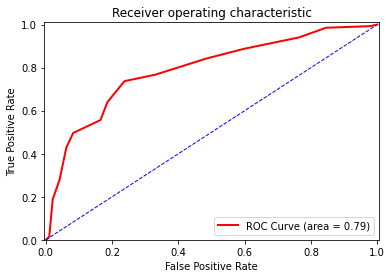

In [62]:
# Show the ROC

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")

plt.show()

As shown thanks to the graph above we can see that nearest neighbor has only a preformance rate of 78.92%. Therefore we can only say its reliable almost 79% of the time.